<a href="https://colab.research.google.com/github/Rushhaabhhh/CartService-Springboot/blob/main/AeroFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement :**

AeroFit, a leading fitness equipment brand, aims to tailor their treadmill recommendations to match the diverse needs of their customer base. By analyzing customer characteristics across different treadmill products, AeroFit seeks to provide personalized recommendations for optimal fitness experiences.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749


#Importing data
data = pd.read_csv("aerofit_treadmill.csv?1639992749")
print(data)

--2024-03-20 09:13:56--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.65.40.189, 18.65.40.200, 18.65.40.103, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.65.40.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-03-20 09:13:56 (2.91 GB/s) - ‘aerofit_treadmill.csv?1639992749’ saved [7279/7279]

    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     KP281   18    Male         14        Single      3        4   29562   
1     KP281   19    Male         15        Single      2        3   31836   
2     KP281   19  Female         14     Partnered      4        3   30699   
3     KP281   19    Male     

 - Analysing Basic Metrics

In [ ]:
data.shape

(180, 9)

In [ ]:
data.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [3]:
data.tail(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
stats = data.describe()
stats

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
data[data['Income'] > 35000]

'''This shows the data with income more than 35000

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
4,KP281,20,Male,13,Partnered,4,2,35247,47
6,KP281,21,Female,14,Partnered,3,3,35247,75
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85
10,KP281,22,Male,14,Single,3,3,36384,85
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


---
+ Value counts for each **column**

In [ ]:
for column in data.columns:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print()

Value counts for Product:
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

Value counts for Age:
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

Value counts for Gender:
Male      104
Female     76
Name: Gender, dtype: int64

Value counts for Education:
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

Value counts for MaritalStatus:
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Value counts for Usage:
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

Value counts for Fitness:
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

Value counts for Income:
45480    14
52302     9
46617     8
54576 

This data shows the count of values in each column respectively

---
+  Unique attributes for each column

In [ ]:
for column in data.columns:
    print(f"Unique attributes for {column}:")
    print(data[column].unique())
    print()

Unique attributes for Product:
['KP281' 'KP481' 'KP781']

Unique attributes for Age:
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

Unique attributes for Gender:
['Male' 'Female']

Unique attributes for Education:
[14 15 12 13 16 18 20 21]

Unique attributes for MaritalStatus:
['Single' 'Partnered']

Unique attributes for Usage:
[3 2 4 5 6 7]

Unique attributes for Fitness:
[4 3 2 1 5]

Unique attributes for Income:
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]

Unique attributes for Miles:
[112  75  66  85  47 141 103  94 113  38 188  56 132 16

This data shows the unique attributes  in each column respectively

---
- Visualizing outliers using **boxplots**

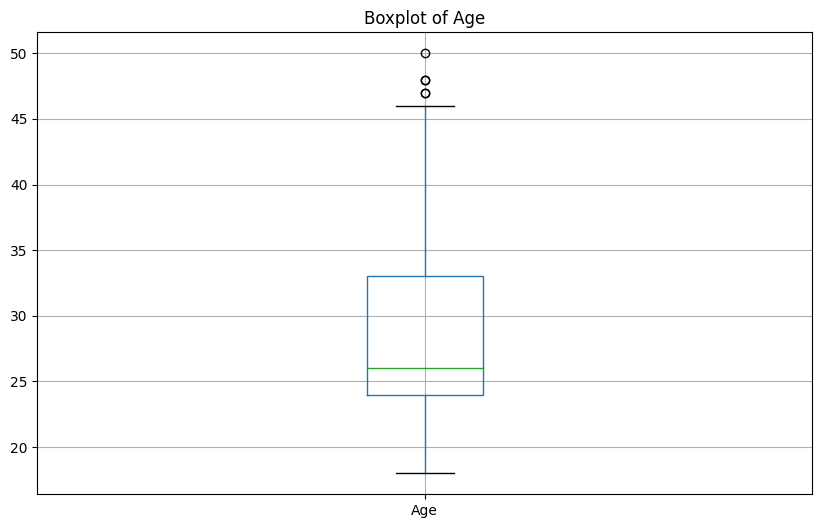

In [ ]:
plt.figure(figsize=(10, 6))
data[['Age']].boxplot()
plt.title('Boxplot of Age')
plt.show()

This age boxplot shows that :
- The age range falls between 18 to 50
- The median age is approximately 26
- Three outliers exist at ages 46, 47, and 50

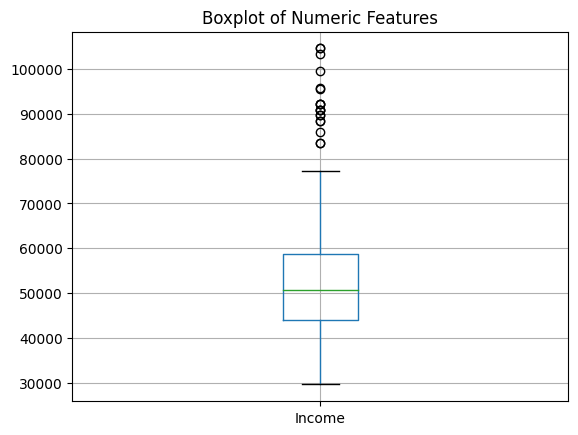

In [ ]:
data[['Income']].boxplot()
plt.title('Boxplot of Income')
plt.show()

This Income boxplot shows that
- The range spans from 29500 to 104000
- Median income is 50500
- Many outliers are present compared to the majority customers


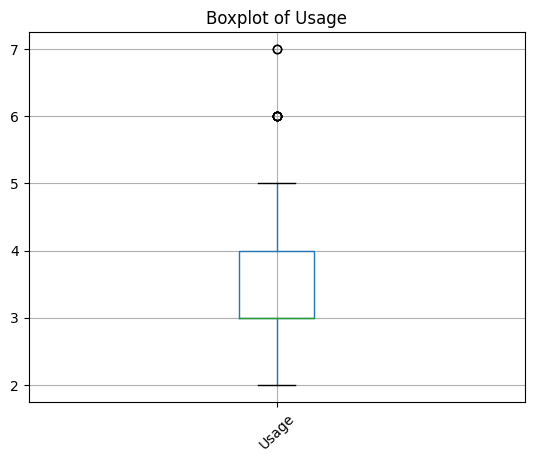

In [ ]:
data[['Usage']].boxplot()
plt.title('Boxplot of Usage')
plt.show()

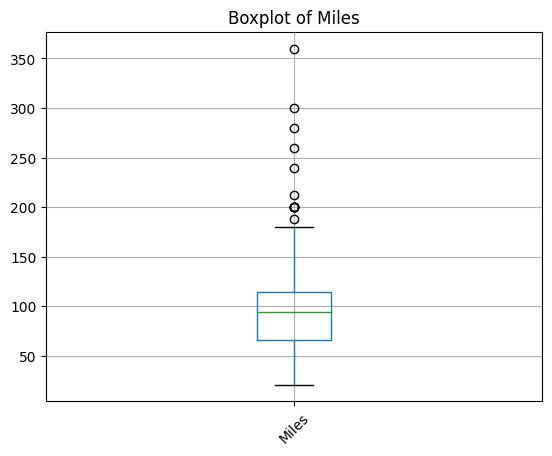

In [ ]:
data[['Miles']].boxplot()
plt.title('Boxplot of Miles')
plt.show()

In [ ]:
# 3. For enitre data

cols = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']
outliers = data[cols][((data[cols] - data[cols].median()).abs() > outlier_threshold * data[cols].std())]
print("Outliers in All ")
print(outliers)

Outliers in All 
      Age  Education  Usage    Income  Fitness  Miles
0     NaN        NaN    NaN       NaN      NaN    NaN
1     NaN        NaN    NaN       NaN      NaN    NaN
2     NaN        NaN    NaN       NaN      NaN    NaN
3     NaN       12.0    NaN       NaN      NaN    NaN
4     NaN       13.0    NaN       NaN      NaN    NaN
..    ...        ...    ...       ...      ...    ...
175  40.0       21.0    6.0   83416.0      5.0  200.0
176  42.0        NaN    5.0   89641.0      NaN  200.0
177  45.0        NaN    5.0   90886.0      5.0    NaN
178  47.0        NaN    NaN  104581.0      5.0    NaN
179  48.0        NaN    NaN   95508.0      5.0  180.0

[180 rows x 6 columns]


---
**Affect of Marital status, Gender, and Age on Product purchasing**


1. Marital Status vs. Product Purchased: Visualizes the distribution of marital status categories (e.g., single, partnered) across different products.

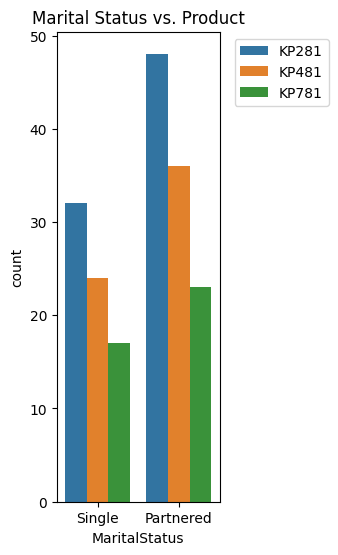

In [ ]:
import seaborn as sns
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='MaritalStatus', hue='Product')
plt.title('Marital Status vs. Product')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(pad=-2)
plt.show()

+ There seems to be a relatively even distribution of product purchases across different marital status categories. However, partnered individuals show a slightly higher preference for certain products compared to single individuals.

2. Gender vs. Product Purchased: Shows the distribution of gender categories (e.g., male, female) for each product.

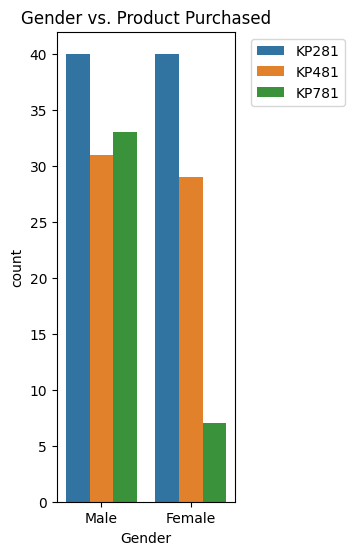

In [ ]:
plt.subplot(1, 3, 2)
sns.countplot(data=data, x='Gender', hue='Product')
plt.title('Gender vs. Product Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(pad=-2)
plt.show()

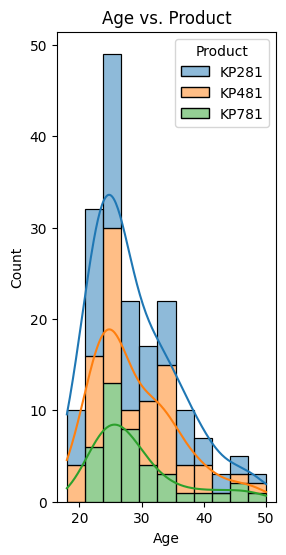

In [ ]:
plt.subplot(1, 3, 3)
sns.histplot(data=data, x='Age', hue='Product', multiple="stack", kde=True)
plt.title('Age vs. Product')
plt.tight_layout(pad=-2)
plt.show()

+ Both male and female customers exhibit similar preferences for the various products offered by AeroFit. There is no significant gender-based preference observed in the distribution of product purchases.

3. Age vs. Product Purchased: Displays the distribution of age for each product, allowing us to observe any differences in age distribution across products.

+ The distribution of product purchases varies across different age groups. Younger customers, particularly those in their early to mid-20s, show a preference for certain products, while older customers, especially those in their late 20s to mid-30s, tend to favor different products. Additionally, there are noticeable outliers in the age distribution for certain products, indicating specific age groups with distinct preferences.

---
2. Using a Scatterplot to find the relationship between contonous variables and output variables

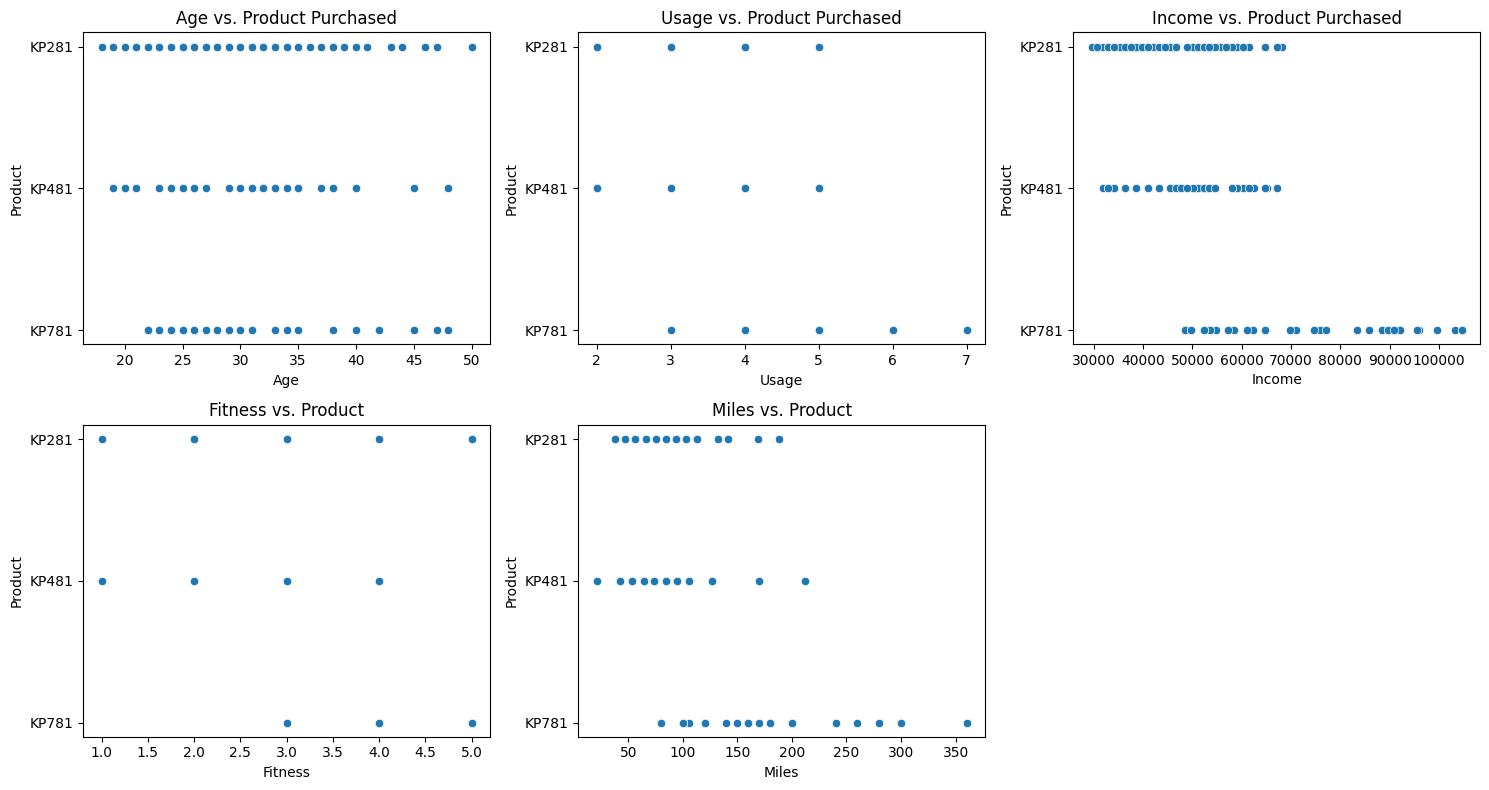

In [ ]:
plt.figure(figsize=(15, 8))

# Age vs. Product Purchased
plt.subplot(2, 3, 1)
sns.scatterplot(data=data, x='Age', y='Product')
plt.title('Age vs. Product Purchased')

# Usage vs. Product Purchased
plt.subplot(2, 3, 2)
sns.scatterplot(data=data, x='Usage', y='Product')
plt.title('Usage vs. Product Purchased')

# Income vs. Product Purchased
plt.subplot(2, 3, 3)
sns.scatterplot(data=data, x='Income', y='Product')
plt.title('Income vs. Product Purchased')

# Fitness vs. Product Purchased
plt.subplot(2, 3, 4)
sns.scatterplot(data=data, x='Fitness', y='Product')
plt.title('Fitness vs. Product')

# Miles vs. Product Purchased
plt.subplot(2, 3, 5)
sns.scatterplot(data=data, x='Miles', y='Product')
plt.title('Miles vs. Product')

plt.tight_layout()
plt.show()

**1. Age vs. Product Purchased :**
Age influences product preference; younger customers lean towards specific products, while older ones exhibit diverse choices.

**2. Usage vs. Product Purchased :**
Usage frequency impacts product preference, with frequent users showing preferences for specific products.

**3. Income vs. Product Purchased:**
Higher-income customers opt for premium products, while lower-income customers prefer budget-friendly options.

**4. Fitness vs. Product Purchased:**
Fitness level correlates with product choice; higher fitness levels tend towards advanced equipment.

**5. Miles vs. Product Purchased:**
Running distance reflects product preference; longer distances favor advanced fitness equipment.

---
+ Countplot of Age

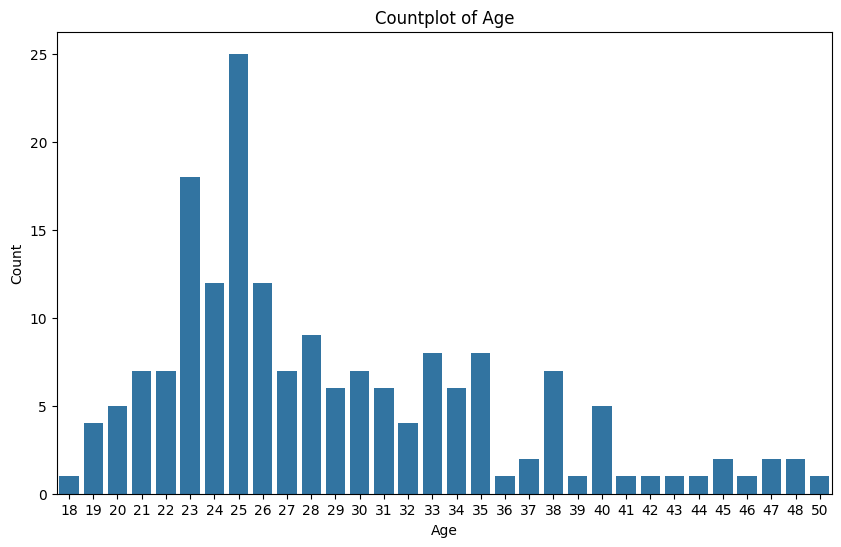

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=data)
plt.title('Countplot of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

+ Distplot of Income

<ipython-input-106-13bd4bb7489d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Income'], kde=True)


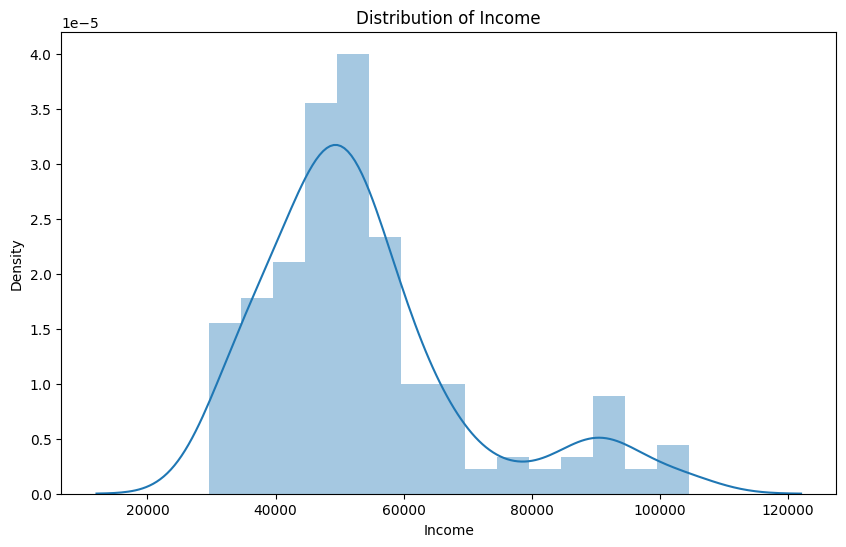

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(data['Income'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

+  Pie chart of Usage Distribution

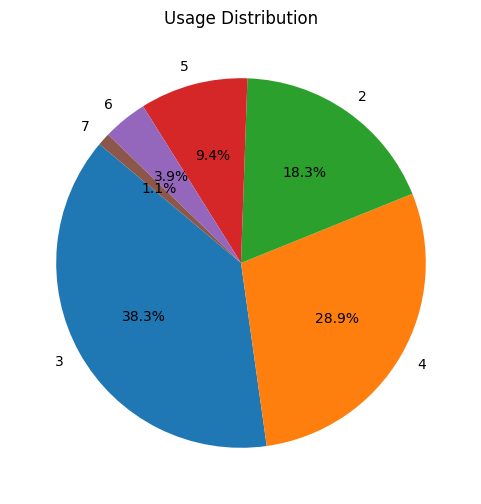

In [ ]:
usage_counts = data['Usage'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(usage_counts, labels=usage_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Usage Distribution')
plt.show()

---

+ Marginal Probability for the Product

In [ ]:
cross_tab = pd.crosstab(index=data['Product'], columns='Marginal Prob', normalize=True)
print(cross_tab)

col_0    Marginal Prob
Product               
KP281         0.444444
KP481         0.333333
KP781         0.222222



The marginal probability analysis reveals that KP281 is the most frequently purchased product, followed by KP481 and KP781, suggesting varying levels of popularity among customers.

---

+  Conditional probabilities of purchasing each product based on different attributes




In [ ]:
columns_of_interest = ['Age', 'Gender', 'Education', 'MaritalStatus', 'Fitness', 'Income', 'Miles']
conditional_probabilities = {}

for column in columns_of_interest:
    cross_tab = pd.crosstab(index=data[column], columns=data['Product'], normalize='index')
    conditional_probabilities[column] = cross_tab

    cross_tab = cross_tab.round(2)
    conditional_probabilities[column] = cross_tab

for column, cross_tab in conditional_probabilities.items():
    print(f"\nConditional Probability of Purchasing Each Product based on {column}:")
    print(cross_tab)


Conditional Probability of Purchasing Each Product based on Age:
Product  KP281  KP481  KP781
Age                         
18        1.00   0.00   0.00
19        0.75   0.25   0.00
20        0.40   0.60   0.00
21        0.57   0.43   0.00
22        0.57   0.00   0.43
23        0.44   0.39   0.17
24        0.42   0.25   0.33
25        0.28   0.44   0.28
26        0.58   0.25   0.17
27        0.43   0.14   0.43
28        0.67   0.00   0.33
29        0.50   0.17   0.33
30        0.29   0.29   0.43
31        0.33   0.50   0.17
32        0.50   0.50   0.00
33        0.25   0.62   0.12
34        0.33   0.50   0.17
35        0.38   0.50   0.12
36        1.00   0.00   0.00
37        0.50   0.50   0.00
38        0.57   0.29   0.14
39        1.00   0.00   0.00
40        0.20   0.60   0.20
41        1.00   0.00   0.00
42        0.00   0.00   1.00
43        1.00   0.00   0.00
44        1.00   0.00   0.00
45        0.00   0.50   0.50
46        1.00   0.00   0.00
47        0.50   0.00   0.50
48    

**Observations of Conditional Probabilities:**

1. **Age**: Younger customers (18-25) tend to prefer KP281, while older customers (35-50) show more balanced preferences.

2. **Gender**: Females are more likely to purchase KP481, while males show a preference for KP781.

3. **Education**: Preferences are consistent across education levels, with KP281 being the most preferred product.

4. **Marital Status**: Partnered customers have a slightly higher probability of purchasing KP281.

5. **Fitness**: Customers with higher fitness levels show a preference for KP281.

6. **Income**: Higher-income customers tend to prefer KP281, with preferences consistent across income levels.

7. **Miles**: No significant trends are observed in preferences based on travel distance.
---

+ Using heatmap to find the correlation between the attributes

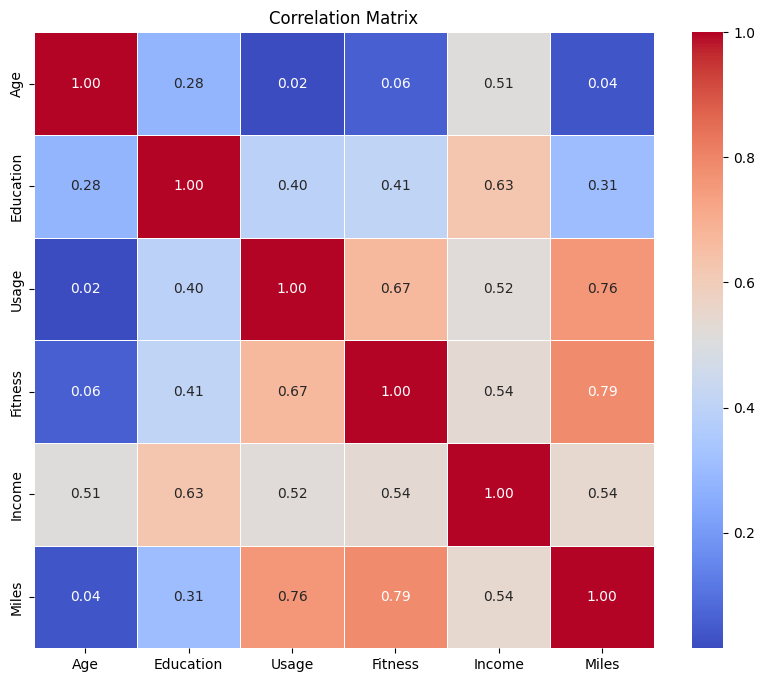

In [ ]:
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**The heatmap indicates:**

+ Moderate positive correlation between income and age.
+ Moderate positive correlation between usage and miles.
+ Slight positive correlation between fitness and usage.
+ Weak positive correlation between fitness and miles.
+ Weak positive correlation between age and education.
+ Weak positive correlation between income and miles.

---
# **Recommendations**

*Product KP281:*
+ Target Age Group: 20-35
+ Gender: Balanced between male and female
+ Income Group: Primarily 30,000 to 50,000

*Product KP481:*
+ Target Age Group: 20-35
+ Gender: Balanced between male and female
+ Income Group: Wide range, with concentration around 45,000 to 60,000

*Product KP781:*
+ Target Age Group: 22-30
+ Gender: Male-dominated
+ Income Group: Varied, but with a significant portion earning over 70,000

---